<a href="https://colab.research.google.com/github/danlamberg/DS_AprendizadoMaquina/blob/main/AtividadeAvaliativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


ALUNO: DANIEL DE OLIVEIRA LAMBERG

ALUNO: DIOGO VARONI DE MOURA

RM: 12210919

RM: 13135759

TURMA: Data Science - Osório Sala 404 - QUA - 19:00 - 21:40

Os dados foram extraídos do site do Kaggle:
[Desempenho dos alunos nos exames](https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams?select=exams.csv)

ATRIBUTOS DO DATAFRAME

Sobre o conjunto de dados
Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas.

Exemplos de perguntas de pesquisa:

Quão eficaz é o curso de preparação para o teste?

Quais os principais fatores que contribuem para os resultados dos testes?

Qual seria a melhor maneira de melhorar as notas dos alunos em cada teste?

Que padrões e interações nos dados você pode encontrar?


### **COLUNAS**

Gender: Gênero

Race/Ethnicity: Raça/Etnia

Parental Level: Escolaridade, nível dos pais

Lunch: Almoço

Test Preparation: Preparação do Teste

Math Score: Pontuação de Matemática

Reading Score: Pontuação de Leitura

Writing Score: Pontuação de Escrita

Importando Pandas e bibliotecas:

In [479]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=FutureWarning)


sns.set()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [480]:
df = pd.read_csv('/content/drive/MyDrive/BSI/DATA SCIENCE/Colab Notebooks/AtividadeSegundoBimestre/exams.csv',
                    sep=',', encoding='utf-8')

Visualizando o que está no Data Frame, visualização das primeiras linhas:

In [481]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


Método de rotação do Data Frame:

In [482]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
gender,male,female,male,male,male,female,female,male,male,male,...,male,female,male,female,male,male,male,female,female,male
race/ethnicity,group A,group D,group E,group B,group E,group D,group A,group E,group D,group C,...,group D,group C,group C,group A,group E,group C,group D,group C,group C,group A
parental level of education,high school,some high school,some college,high school,associate's degree,high school,bachelor's degree,some college,high school,some college,...,some college,associate's degree,some college,associate's degree,high school,high school,associate's degree,some high school,some college,some college
lunch,standard,free/reduced,free/reduced,standard,standard,standard,standard,standard,standard,free/reduced,...,standard,standard,standard,standard,free/reduced,standard,free/reduced,free/reduced,standard,standard
test preparation course,completed,none,none,none,completed,none,none,completed,none,none,...,none,none,none,none,completed,none,completed,none,none,completed
math score,67,40,59,77,78,63,62,93,63,47,...,67,87,69,58,86,73,85,32,73,65
reading score,67,59,60,78,73,77,59,88,56,42,...,55,93,63,54,82,70,91,35,74,60
writing score,63,55,50,68,68,76,63,84,65,45,...,53,88,66,58,75,65,92,41,82,62


In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Valores Missing (NAN):

In [484]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Análise dos tipos de atributos:

In [485]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Renomeando colunas 

In [486]:
df.rename(columns={'gender': 'genero'}, inplace=True)
df.rename(columns={'race/ethnicity': 'raca'}, inplace=True)
df.rename(columns={'parental level of education': 'escolaridade_dos_pais'}, inplace=True)
df.rename(columns={'test preparation course': 'preparacao_para_teste'}, inplace=True)
df.rename(columns={'math score': 'pontuacao_matematica'}, inplace=True)
df.rename(columns={'reading score': 'pontuacao_leitura'}, inplace=True)
df.rename(columns={'writing score': 'pontuacao_escrita'}, inplace=True)
df.drop(columns={'lunch'}, inplace=True)

In [487]:
df.head()

,genero,raca,escolaridade_dos_pais,preparacao_para_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
0,male,group A,high school,completed,67,67,63
1,female,group D,some high school,none,40,59,55
2,male,group E,some college,none,59,60,50
3,male,group B,high school,none,77,78,68
4,male,group E,associate's degree,completed,78,73,68


Visualização gráfica com Plotly

In [488]:
import plotly.express as px

In [489]:
hist =  px.histogram (df,  x = "raca", nbins=60) 
hist.update_layout(width=600,height=400,title_text='Distribuição das raças') 
hist.show()

Visualização gráfica com Seaborn

In [490]:
import seaborn as sns

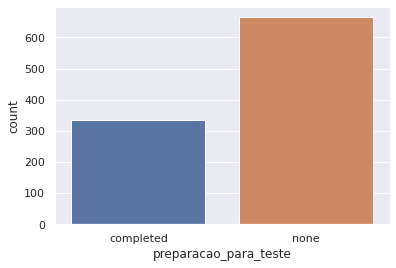

In [491]:
sns.countplot(x='preparacao_para_teste', data=df);

In [492]:
df.shape

(1000, 7)

Dados Estatísticos

In [493]:
df.describe()

,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


Análise dos outliers

In [494]:
import plotly.express as px

In [495]:
boxplot = px.box(df, y="pontuacao_matematica")
boxplot.show()

In [496]:
boxplot = px.box(df, y="pontuacao_leitura")
boxplot.show()

In [497]:
boxplot = px.box(df, y="pontuacao_escrita")
boxplot.show()

## PRÉ-PROCESSAMENTO

In [498]:
df.head(12)

,genero,raca,escolaridade_dos_pais,preparacao_para_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
0,male,group A,high school,completed,67,67,63
1,female,group D,some high school,none,40,59,55
2,male,group E,some college,none,59,60,50
3,male,group B,high school,none,77,78,68
4,male,group E,associate's degree,completed,78,73,68
5,female,group D,high school,none,63,77,76
6,female,group A,bachelor's degree,none,62,59,63
7,male,group E,some college,completed,93,88,84
8,male,group D,high school,none,63,56,65
9,male,group C,some college,none,47,42,45


Transformando variáveis categóricas em numéricas

In [499]:
df2['genero'].replace({'male': 0, 'female': 1}, inplace=True)

In [500]:
df2.head(10)

,genero,raca,escolaridade_dos_pais,preparacao_para_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
0,0,0,high school,completed,67,67,63
1,1,3,some high school,none,40,59,55
2,0,4,some college,none,59,60,50
3,0,1,high school,none,77,78,68
4,0,4,associate's degree,completed,78,73,68
5,1,3,high school,none,63,77,76
6,1,0,bachelor's degree,none,62,59,63
7,0,4,some college,completed,93,88,84
8,0,3,high school,none,63,56,65
9,0,2,some college,none,47,42,45


Escalonando

In [501]:
from sklearn.preprocessing import StandardScaler

In [502]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

ValueError: ignored

In [ ]:
df2_esc


K-MEANS COM DOIS ATRIBUTOS

In [503]:
df2

,genero,raca,escolaridade_dos_pais,preparacao_para_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
0,0,0,high school,completed,67,67,63
1,1,3,some high school,none,40,59,55
2,0,4,some college,none,59,60,50
3,0,1,high school,none,77,78,68
4,0,4,associate's degree,completed,78,73,68
...,...,...,...,...,...,...,...
995,0,2,high school,none,73,70,65
996,0,3,associate's degree,completed,85,91,92
997,1,2,some high school,none,32,35,41
998,1,2,some college,none,73,74,82


In [504]:
dados = df2.iloc[:, [2,3]].values

In [505]:
dados

array([['high school', 'completed'],
       ['some high school', 'none'],
       ['some college', 'none'],
       ...,
       ['some high school', 'none'],
       ['some college', 'none'],
       ['some college', 'completed']], dtype=object)

**Utilizando o método Elbow Method**

In [506]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados)
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

ValueError: ignored

In [507]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

ValueError: ignored

<Figure size 720x360 with 0 Axes>

AGRUPAMENTO

In [508]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [509]:
kmeans1 = kmeans.fit(dados)

ValueError: ignored

In [ ]:
centroides = kmeans1.cluster_centers_
centroides

In [ ]:
valor = kmeans1.labels_
valor

In [ ]:
dados[3,:]

In [ ]:
valor[3]

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
graf1 = px.scatter(x = dados[:,0], y = dados[:,1], color=valor)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'Rendimento anual (K$)')
graf3.update_yaxes(title = 'Valor')
graf3.show()

In [ ]:
agrupamento = pd.DataFrame(valor, columns = ['Grupo'])
agrupamento

In [ ]:
df3 = pd.concat([df, agrupamento],axis=1)
df3

In [ ]:
df3.iloc[150 , :]

In [ ]:
df3.loc[df3.identificacao == 92] 

In [ ]:
grupo0 = df3.loc[df3.Grupo == 0]
grupo0 

In [ ]:
grupo0.shape

In [ ]:
grupo1 = df3.loc[df3.Grupo == 1]
grupo1

In [ ]:
grupo1.shape

**K Means com todos os atributos**

In [ ]:
df2_esc

In [ ]:
df2_esc.shape

## Elbow Method 

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_esc)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 15), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [ ]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 5, max_iter = 300)

In [ ]:
kmeans2 = kmeans.fit(df2_esc)

In [ ]:
centroides = kmeans2.cluster_centers_
centroides

In [ ]:
escala.inverse_transform(kmeans2.cluster_centers_)

In [ ]:
classificacao2 = kmeans2.labels_
classificacao2

In [ ]:
classificacao2[199]

In [ ]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ['Grupo'])
agrupamento2

In [ ]:
df4 = pd.concat([df, agrupamento2],axis=1)
df4

In [ ]:
df4.iloc[125 , :]

In [ ]:
df4.loc[df4.identificacao == 76] 

In [ ]:
grupo0 = df4.loc[df4.Grupo == 0]
grupo0 

In [ ]:
grupo0.shape